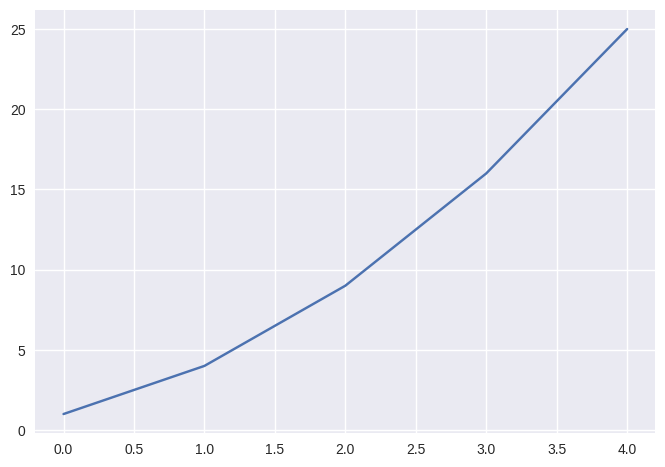

In [3]:
import matplotlib.pyplot as plt

squares = [1, 4, 9, 16, 25]

fig, ax = plt.subplots()
ax.plot(squares)

plt.show()

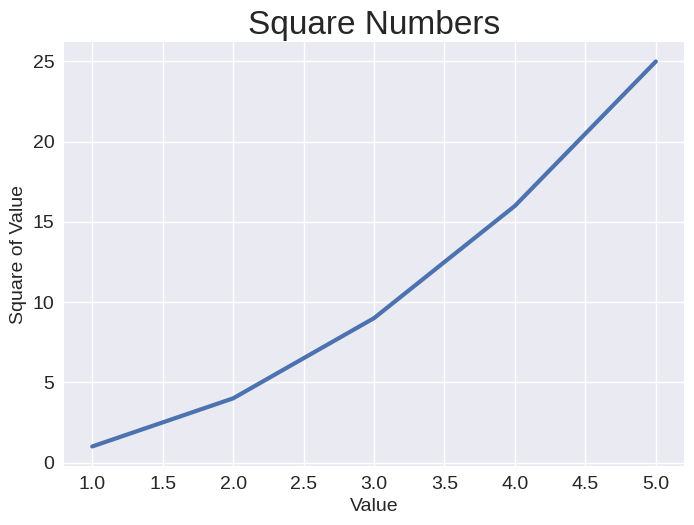

In [5]:
import matplotlib.pyplot as plt

input_values = [1, 2, 3, 4, 5]
squares = [1, 4, 9, 16, 25]

fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth=3)

# Set chart title and label axes.
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# Set size of tick labels.
ax.tick_params(labelsize=14)

plt.show()

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

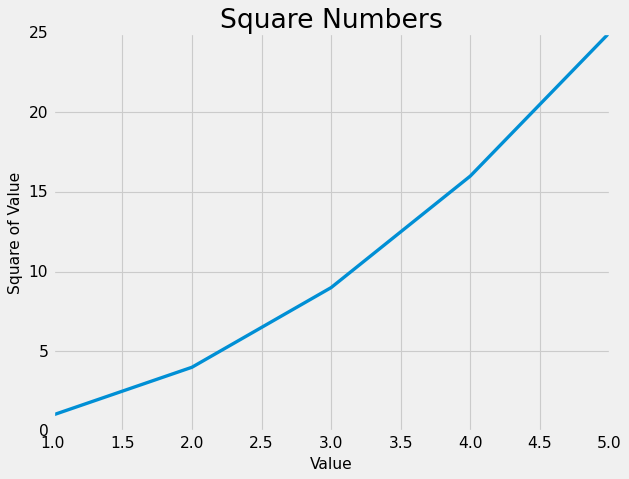

In [11]:
import matplotlib.pyplot as plt

input_values = [1, 2, 3, 4, 5]
squares = [1, 4, 9, 16, 25]

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth=3)

# Set chart title and label axes.
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# Set size of tick labels.
ax.tick_params(labelsize=14)

plt.show()

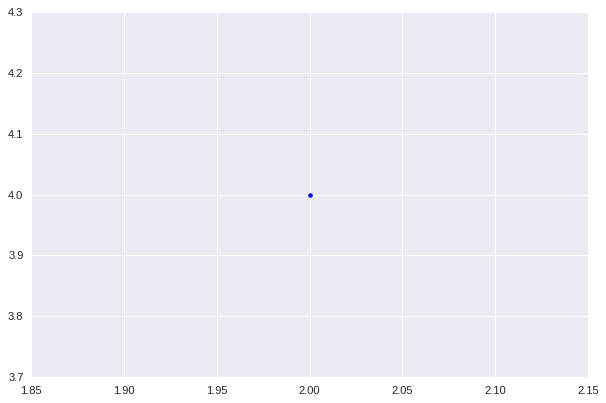

In [12]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.scatter(2, 4)

plt.show()

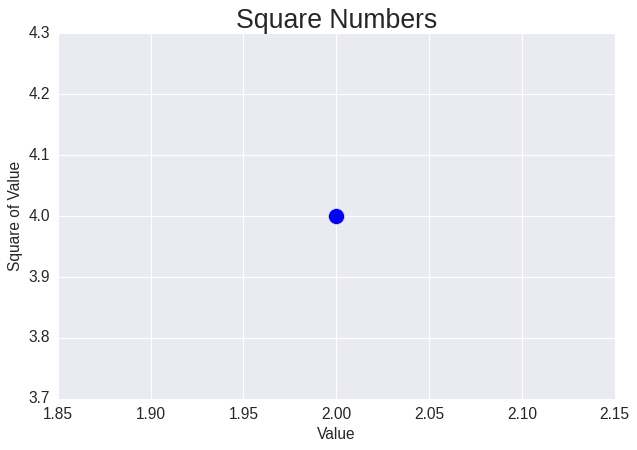

In [13]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.scatter(2, 4, s=200)

# Set chart title and label axes.
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square of Value", fontsize=14)

# Set size of tick labels.
ax.tick_params(labelsize=14)

plt.show()

In [15]:
def setformshow():
    # Set chart title and label axes.
    ax.set_title("Square Numbers", fontsize=24)
    ax.set_xlabel("Value", fontsize=14)
    ax.set_ylabel("Square of Value", fontsize=14)

    # Set size of tick labels.
    ax.tick_params(labelsize=14)

    plt.show()


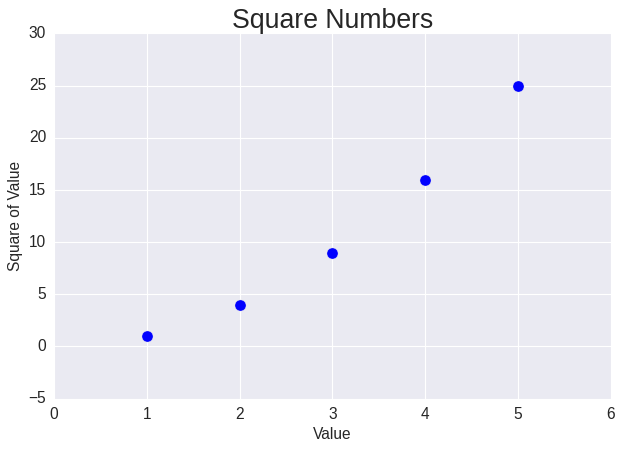

In [16]:
x_values = [1, 2, 3, 4, 5]
y_values = [1, 4, 9, 16, 25]

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s=100)
setformshow()

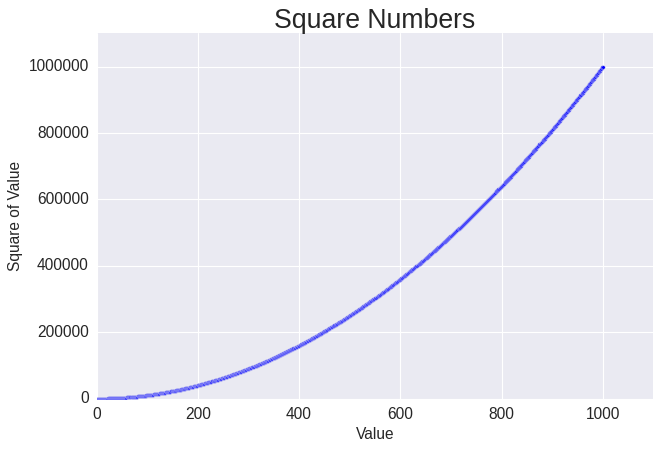

In [17]:
x_values = range(1, 1001)
y_values = [x**2 for x in x_values]

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s=10)
ax.axis([0, 1100, 0, 1_100_000])
setformshow()

In [18]:
from random import randint

class Die:
    """Represent a single die"""

    def __init__(self, num_sides=6):
        """Assume a six-sided die."""
        self.num_sides = num_sides

    def roll(self):
        """"Return a random value between 1 and number of sides."""
        return randint(1, self.num_sides)

In [20]:
# Create a D6.
die = Die()

# Make some rolls, and store results in a list.
results = []
for roll_num in range(10):
    result = die.roll()
    results.append(result)

print(results)

[1, 2, 3, 4, 5, 3, 3, 3, 5, 1]


In [25]:
# Make some rolls, and store results in a list.
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

# Analyze the results.
frequencies = []
poss_results = range(1, die.num_sides+1)
for value in poss_results:
    frequency = results.count(value)
    frequencies.append(frequency)

print(frequencies)

[1667230, 1668299, 1665833, 1666872, 1664663, 1667103]


In [31]:
import plotly.express as px

results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

# Analyze the results.
frequencies = []
poss_results = range(1, die.num_sides+1)

for value in poss_results:
    frequency = results.count(value)
    frequencies.append(frequency)

# Visualize the results.
title = "Results of Rolling One D6 1,000 Times"
labels = {'x': 'Result', 'y': 'Frequency of Result'}
fig = px.bar(x=poss_results, y=frequencies, title=title, labels=labels)
fig.show()

In [33]:
from datetime import datetime
first_date = datetime.strptime('2021-07-01', '%Y-%m-%d')
print(first_date)

2021-07-01 00:00:00


In [45]:
from pathlib import Path
import json

import plotly.express as px

BASE='/home/richard/Dev/Py/crash/proj/weather'

# Read data as a string and convert to a Python object.
path = Path(f'{BASE}/eq_data/eq_data_30_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# # Create a more readable version of the data file.
# path = Path(f'{BASE}/eq_data/readable_eq_data.geojson')
# readable_contents = json.dumps(all_eq_data, indent=4)
# path.write_text(readable_contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']
THRESHHOLD = 5.5

mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    if mag > THRESHHOLD:
        mags.append(mag)
        lons.append(eq_dict['geometry']['coordinates'][0])
        lats.append(eq_dict['geometry']['coordinates'][1])
        eq_titles.append(eq_dict['properties']['title'])

title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, size=mags, title=title,
        color=mags,
        color_continuous_scale='Viridis',
        labels={'color':'Magnitude'},
        projection='natural earth',
        hover_name=eq_titles,
    )

fig.show()